In [164]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [165]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [166]:
X = np.array([
#    0  1  2  3  4  5  6  7  8
    [0, 1, 1, 0, 0, 1, 1, 0, 0], # 3
    [1, 0, 0, 1, 0, 1, 0, 1, 0], # 4
    [1, 1, 0, 0, 0, 1, 0, 1, 1], # 5
    [1, 1, 1, 1, 1, 1, 1, 1, 1]  # 8
])

In [167]:
y = np.array([
    [1,0,0,0], # 1
    [0,1,0,0], # 2
    [0,0,1,0], # 3
    [0,0,0,1] # etc
])

In [168]:
def create_model():
    model = Sequential([
        Dense(16, input_dim=9, activation='relu'),
        Dense(8, activation='relu'),
        Dense(4, activation='softmax')
    ])
    # Use mean squared error as required
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [169]:
target_mse = 0.01
final_loss = 1.0
all_losses = []

while final_loss > target_mse:
    model = create_model()
    history = model.fit(X, y, epochs=300, verbose=0)
    final_loss = history.history['loss'][-1]
    all_losses = history.history['loss']
    print(f"Finished run, final MSE = {final_loss:.4f}")

print("Training complete")

Finished run, final MSE = 0.0052
Training complete


In [170]:
loss, acc = model.evaluate(X, y, verbose=0)
print("Помилка: ", loss)
print("Точність: ", acc)

Помилка:  0.00510144978761673
Точність:  0.00510144978761673


In [171]:
predictions = model.predict(X)
print(np.round(predictions, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
[[0.93 0.   0.   0.07]
 [0.03 0.83 0.09 0.05]
 [0.   0.08 0.89 0.03]
 [0.05 0.02 0.03 0.9 ]]


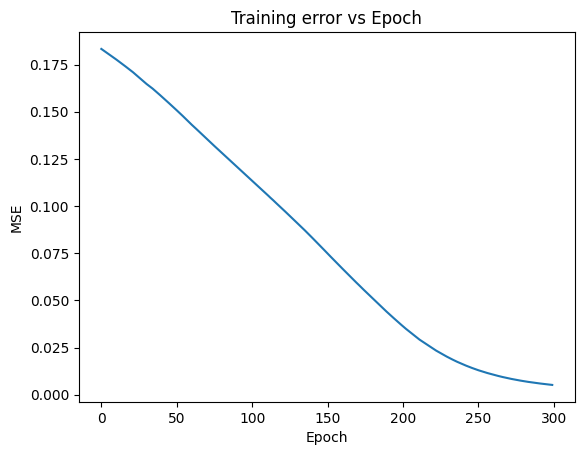

In [172]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training error vs Epoch')
plt.show()